# Evaluate Shift Experiments
This notebook comprises quantitative and qualitative evaluations of the shift detection experiments.
As the two unsupervised experiments (bi nd mono) are seen as one experiment each, but the one supervised experiment (distech) is seen as two experiments, the notebook is split between the unsupervised and the supervised experiments:

1. unsupervised
    - quantitative (= graphs and numbers)
    - qualitative (= print clusters)
2. supervised
    - quantitative (= graphs and numbers)
    - (= print clusters)



In [1]:
import utils
from eval_utils import *
import numpy as np
import scipy.stats as sts
from typing import List, Dict, Tuple
import ast

import seaborn as sns
import pandas
from pandas import DataFrame
from matplotlib import pyplot as plt
%matplotlib inline

The list of tuples below combines the file paths to the for each experiments.

In [2]:
d1 = "outputs/shift_experiments_apshifts/"
d2 = "outputs/shift_experiments_apsource/"
d3 = "outputs/shift_experiments_noalign_apshifts/"
d4 = "outputs/shift_experiments_noalign_apsource/"

y1 = "1740_1770/"
y2 = "1860_1890/"

e1 = "unsup_bi/"
e2 = "unsup_mono/"
e3 = "dis_tech/"

s1 = "all"
s2 = "all_discourse"
s3 = "all_technical"

          # unsup_bi        # unsup_mono      # discourse       technical
combos = [(d1, y1, e1, s1), (d1, y1, e2, s1), (d1, y1, e3, s2), (d1, y1, e3, s3),  # 1740 APshifts
          (d2, y1, e1, s1), (d2, y1, e2, s1), (d2, y1, e3, s2), (d2, y1, e3, s3),  # 1740 APfirst = source

          (d1, y2, e1, s1), (d1, y2, e2, s1), (d1, y2, e3, s2), (d1, y2, e3, s3),  # 1860 APshifts
          (d2, y2, e1, s1), (d2, y2, e2, s1), (d2, y2, e3, s2), (d2, y2, e3, s3),  # 1860 APfirst = source

                            (d3, y2, e2, s1), (d3, y2, e3, s2), (d3, y2, e3, s3),  # noalign APshifts
                            (d4, y2, e2, s1), (d4, y2, e3, s2), (d4, y2, e3, s3)]  # noalign APfirst = source

In [49]:
def make_kde_plots(ax, 
                   series:List[pandas.Series], 
                   labels:List[str], colors:List[str], linestyles:List[str], linewidths:List[int],
                   method='scott'):
    for s,label,c,ls,lw in zip(series, labels, colors, linestyles, linewidths):
        pandas.Series(s).plot.kde(bw_method=method, label=label, linestyle=ls, color=c, linewidth=lw, ax=ax)


def fitt(x,y): 
    return  np.poly1d(np.polyfit(x, y, 1))(x) # returns a linear regression line
      
def scatter_and_regressionline(ax, x, ys, labels, colors, axlabels, axlimits, dotsize, linewidth):
    
    for y, l, c in zip(ys, labels, colors):
        ax.scatter(x, y, s=dotsize,    color=c)
        ax.plot(x, fitt(x,y), label=l, color=c, linewidth=linewidth)
        
    ax.set_xlim(axlimits[0])
    ax.set_ylim(axlimits[1])
    ax.grid()
    ax.legend()
    ax.set_ylabel(axlabels[0])
    ax.set_xlabel(axlabels[1])

# Unsupervised Experiments

In [12]:
# copy-paste tuples from above to here
dirname1, yearstring, exp_name, filestub = (d1, y2, e2, s1) # this should be an 'APshifts' tuple
dirname2, yearstring, exp_name, filestub = (d2, y2, e2, s1) # this should be an 'APsource' tuple

extra = "_noalign" if dirname1==d3 and dirname2==d4 else ""
tuples = True if exp_name==e1 or exp_name==e2 else False


# just for outputs
visuals_dir = "visuals/shift_experiments"+extra+"/"+yearstring

# These are the results for clustering the difference vectors
dataset_path1 = dirname1+yearstring+exp_name
stats_aps, df_dist_aps, df_clust_aps, df_bl = read_results(dataset_path1, 
                                                               filestub, exp_name, 
                                                               tuples=tuples)
#These are the results for clustering on X and then sorting the differences accordingly
dataset_path2 = dirname2+yearstring+exp_name
stats_src, df_dist_src, df_clust_src = read_results(dataset_path2, 
                                                    filestub, exp_name, 
                                                    with_baseline=False,
                                                    tuples=tuples)

# activate this to produce easier-to-read .txt files from the .tsv files (e.g., they contain fewer numbers)
#make_readable(dataset_path1, filestub, exp_name, extra=extra)
#make_readable(dataset_path2, filestub, exp_name, extra=extra)

## Quantitative Analysis (Unsupervised Experiments)

In [13]:
print("STATIS APS:\n",stats_aps)
print("")
print("STATIS SRC:\n",stats_src)

STATIS APS:
 number_of_shifts	10233
number_of_clusters	774
convergence_criterion	3
param_min_count	15
param_dist_nbs	100
param_dir_k	5
pairdist_csls	True
param_reduce_spaces	10
size_X	17374
size_Y	25165
57.37936	pair_distances
1883.4043	AP_clustering
0.01549	re-organization
0.20786	lengths_and_inner_dist
1.81979	closest_concepts
1942.87677	total

STATIS SRC:
 number_of_shifts	10233
number_of_clusters	748
convergence_criterion	5
param_min_count	15
param_dist_nbs	100
param_dir_k	5
pairdist_csls	True
param_reduce_spaces	10
size_X	17374
size_Y	25165
61.41618	pair_distances
1594.33888	AP_clustering
0.01589	re-organization
0.2028	lengths_and_inner_dist
1.77639	closest_concepts
1657.78396	total


### Plot Distributions of Lengths, Sizes, and Inner Distances; once absolute, once kde-approximated

visuals/shift_experiments/1860_1890/unsup_mono/all_lengths-and-inner_KDE.png


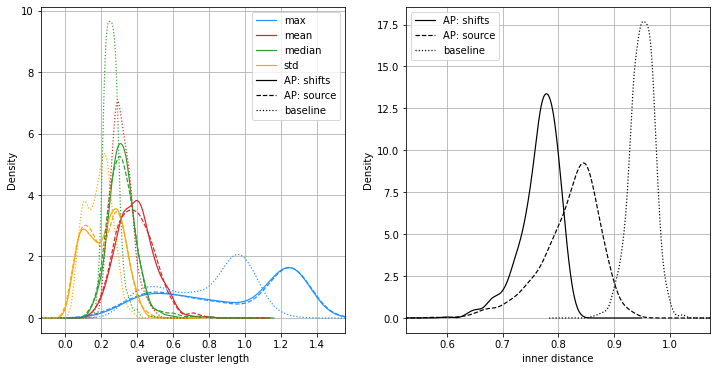

In [14]:
size_factor = 6
linewidth = size_factor/5
rows = 1
columns = 2
fig, axes = plt.subplots(rows, columns, figsize=(size_factor*columns, size_factor*rows))
bw = 'scott' # set the estimation method for KDE. Default is 'scott'. 

cl = {"max":   "dodgerblue", # line color
      "mean":  "tab:red",
      "median":"tab:green",
      "std":   "orange",
      "normal":"black"}
ls = {"aps":"-",          # line style
      "src":"--",
      "bl": ":"}


# distribution of average shift cluster lengths
maxes_aps   = df_clust_aps["max_length"]
means_aps   = df_clust_aps["mean_length"]
medians_aps = df_clust_aps["median_length"]
std_aps     = df_clust_aps["std_length"]

maxes_src   = df_clust_src["max_length"]
means_src   = df_clust_src["mean_length"]
medians_src = df_clust_src["median_length"]
std_src     = df_clust_src["std_length"]

maxes_bl   = df_bl["max_length"]
means_bl   = df_bl["mean_length"]
medians_bl = df_bl["median_length"]
std_bl     = df_bl["std_length"]

        
# make limits for the length measurements graph
variables = [maxes_aps, means_aps, medians_aps, std_aps, 
             maxes_src, means_src, medians_src, std_src, 
             maxes_bl,  means_bl,  medians_bl,  std_bl]
xlim = (min([min(v) for v in variables]) - 0.15, 
        max([max(v) for v in variables]) + 0.15)
 
ax=axes[0]
make_kde_plots(ax, [maxes_aps, means_aps, medians_aps, std_aps],
                   [   "max",     "mean",     "median",     "std"],
                   [cl["max"], cl["mean"], cl["median"], cl["std"]],
                   [ls["aps"]]*4,
                   [linewidth]*4, 
                   method=bw)
make_kde_plots(ax, [maxes_src, means_src, medians_src, std_src],
                   [""]*4,
                   [cl["max"], cl["mean"], cl["median"], cl["std"]],
                   [ls["src"]]*4,
                   [linewidth]*4, 
                   method=bw)
make_kde_plots(ax, [maxes_bl, means_bl, medians_bl, std_bl],
                   [""]*4,
                   [cl["max"], cl["mean"], cl["median"], cl["std"]],
                   [ls["bl"]]*4,
                   [linewidth]*4, 
                   method=bw)
ax.plot([], color=cl["normal"], linestyle=ls["aps"], label="AP: shifts", linewidth=linewidth)
ax.plot([], color=cl["normal"], linestyle=ls["src"], label="AP: source", linewidth=linewidth)
ax.plot([], color=cl["normal"], linestyle=ls["bl"], label="baseline", linewidth=linewidth)
ax.set_xlim(xlim)
ax.grid()
ax.legend()
ax.set_ylabel("Density")
ax.set_xlabel("average cluster length")




# distribution of clusters' inner distance
inner_aps = df_clust_aps["inner_distance"]
inner_src = df_clust_src["inner_distance"]
inner_bl = df_bl["inner_distance"]

ax=axes[1]
make_kde_plots(ax, [inner_aps, inner_src,inner_bl], 
                   ["AP: shifts", "AP: source", "baseline"],
                   ["black"]*3,
                   [ls["aps"], ls["src"], ls["bl"]],
                   [linewidth]*3,
                   method=bw)
ax.set_xlim(min(min(inner_aps), min(inner_src), min(inner_bl))-0.05, 
            max(max(inner_aps), max(inner_src), max(inner_bl))+0.05)
ax.set_ylabel("Density")
ax.set_xlabel("inner distance")
ax.grid()
ax.legend()

print(visuals_dir+exp_name+filestub+"_lengths-and-inner_KDE.png")
#plt.savefig(visuals_dir+exp_name+filestub+"_lengths-and-inner.png", dpi=300)

In [15]:
import numpy as np
print("apshift", np.mean(df_clust_aps["mean_length"]))
print("apsource", np.mean(df_clust_src["mean_length"]))
print("baseline", np.mean(df_bl["mean_length"]))

apshift 0.3900717131345107
apsource 0.38973708438584026
baseline 0.3137008989815674


### Compare Measurements across Training Methods (incremental vs. individual)

In [ ]:
""" same as before """
          # unsup_bi        # unsup_mono      # discourse       technical
combos = [(d1, y1, e1, s1), (d1, y1, e2, s1), (d1, y1, e3, s2), (d1, y1, e3, s3),  # 1740 APshifts
          (d2, y1, e1, s1), (d2, y1, e2, s1), (d2, y1, e3, s2), (d2, y1, e3, s3),  # 1740 APfirst = source

          (d1, y2, e1, s1), (d1, y2, e2, s1), (d1, y2, e3, s2), (d1, y2, e3, s3),  # 1860 APshifts
          (d2, y2, e1, s1), (d2, y2, e2, s1), (d2, y2, e3, s2), (d2, y2, e3, s3),  # 1860 APfirst = source

                            (d3, y2, e2, s1), (d3, y2, e3, s2), (d3, y2, e3, s3),  # noalign APshifts
                            (d4, y2, e2, s1), (d4, y2, e3, s2), (d4, y2, e3, s3)]  # noalign APfirst = source

In [16]:
""" as before, but now with two tuples from the 'noalign' rows """
dirname3, yearstring, exp_name, filestub = (d3, y2, e2, s1) 
dirname4, yearstring, exp_name, filestub = (d4, y2, e2, s1)

extra = "_noalign" if dirname1==d3 and dirname2==d4 else ""
tuples = True if exp_name==e1 or exp_name==e2 else False

dataset_path3 = dirname3+yearstring+exp_name
stats_aps_indiv, df_dist_aps_indiv, df_clust_aps_indiv, df_bl_indiv = read_results(dataset_path3, 
                                                               filestub, exp_name, 
                                                               tuples=tuples)
dataset_path4 = dirname4+yearstring+exp_name
stats_src_indiv, df_dist_src_indiv, df_clust_src_indiv = read_results(dataset_path4, 
                                                    filestub, exp_name, 
                                                    with_baseline=False,
                                                    tuples=tuples)

In [17]:
print("Incremental")
print("APshift", np.mean(df_clust_aps["cluster_size"]))
print("APsource", np.mean(df_clust_src["cluster_size"]))
print("baseline", np.mean(df_bl["cluster_size"]))

print("\nIndividual")
print("APshift", np.mean(df_clust_aps_indiv["cluster_size"]))
print("APsource", np.mean(df_clust_src_indiv["cluster_size"]))
print("baseline", np.mean(df_bl_indiv["cluster_size"]))

Incremental
APshift 13.220930232558139
APsource 13.68048128342246
baseline 13.220930232558139

Individual
APshift 18.776146788990825
APsource 18.11150442477876
baseline 18.776146788990825


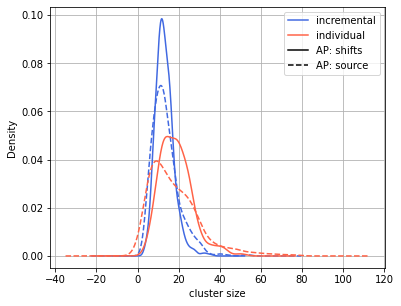

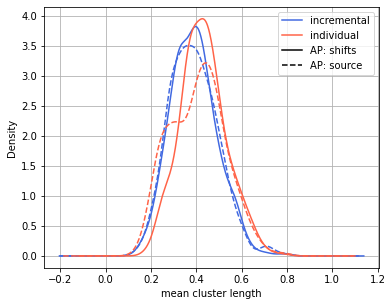

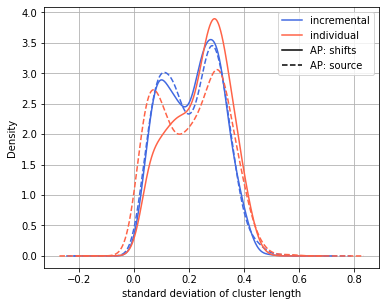

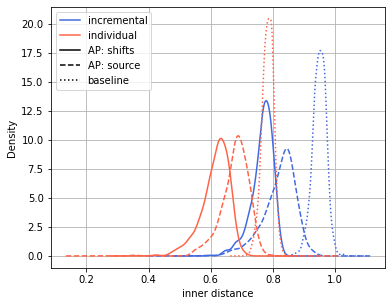

In [18]:
size_factor = 6
linewidth = size_factor/3
rows = 1
columns = 1


c = {"init":"royalblue",
    "indiv":"tomato"}
ls = {"aps":"-",
      "src":"--"}

for aspect,xname in zip(["cluster_size", "mean_length",         "std_length",                           "inner_distance"],
                        ["cluster size", "mean cluster length", "standard deviation of cluster length", "inner distance"]):

    fig, axes = plt.subplots(rows, columns, figsize=(size_factor*columns, 0.8*size_factor*rows))
    ax=axes
    
    # plot each of the measurements individually and for inner distance, also plot the baseline
    pandas.Series(df_clust_aps[aspect]).plot.kde(label="incremental", ax=ax, color=c["init"], linestyle=ls["aps"])
    pandas.Series(df_clust_src[aspect]).plot.kde(label="", ax=ax, color=c["init"], linestyle=ls["src"])
    if aspect == "inner_distance":
        pandas.Series(df_bl[aspect]).plot.kde(label="", ax=ax, color=c["init"], linestyle=":")
    
    pandas.Series(df_clust_aps_indiv[aspect]).plot.kde(label="individual", ax=ax, color=c["indiv"], linestyle=ls["aps"])
    pandas.Series(df_clust_src_indiv[aspect]).plot.kde(label="", ax=ax, color=c["indiv"], linestyle=ls["src"])
    if aspect == "inner_distance":
        pandas.Series(df_bl_indiv[aspect]).plot.kde(label="", ax=ax, color=c["indiv"], linestyle=":")
        
    plt.plot([], label="AP: shifts", linestyle="-", color="black")
    plt.plot([], label="AP: source", linestyle="--", color="black")
    if aspect == "inner_distance":
        plt.plot([], label="baseline", linestyle=":", color="black")
        
    ax.set_xlabel(xname)
    ax.grid()
    ax.legend()
    #plt.savefig("visuals/shift_experiments/training_technique/"+aspect+".png", dpi=300)



### Make scatter Plots of Lengths against Inner Distances (not Included in the Thesis)

visuals/shift_experiments/1860_1890/unsup_mono/inner_length_std.png
correlations     max     mean    median  std   
APshifts         0.1578  0.0506  0.0118  0.1372
APsource         0.2442  0.1970  0.1375  0.2330
baseline         -0.0109  -0.1358  -0.1492  -0.0070


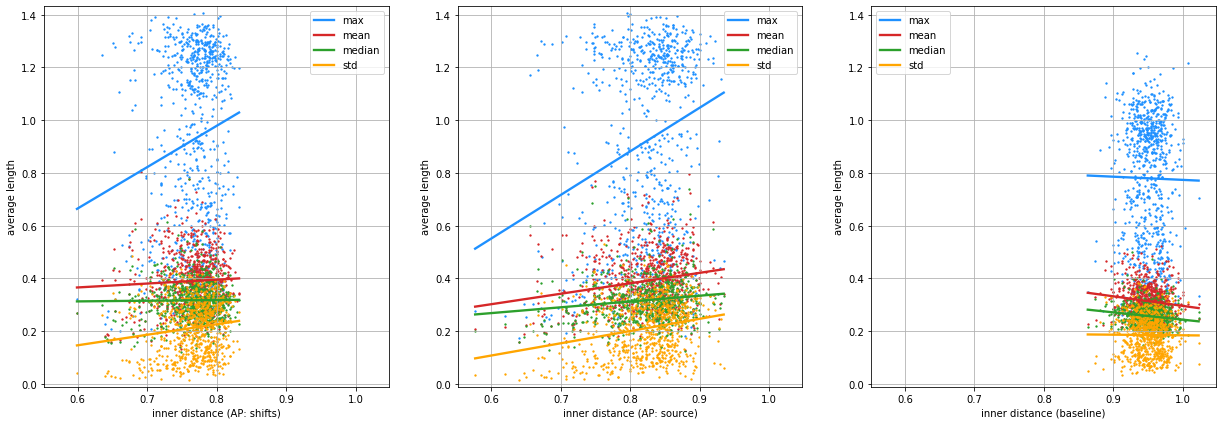

In [23]:
size_factor = 7
linewidth = size_factor/3 # for line plots
dotsize = size_factor*0.25 # for scatter plots
rows = 1
columns = 3
fig, axes = plt.subplots(rows, columns, figsize=(size_factor*columns, size_factor*rows))

# colors
c = {"max":   "dodgerblue", 
     "mean":  "tab:red",
     "median":"tab:green",
     "std":   "orange"}

 
# [0,0]
aps_maxes   = df_clust_aps["max_length"]
aps_means   = df_clust_aps["mean_length"]
aps_medians = df_clust_aps["median_length"]
aps_std     = df_clust_aps["std_length"]
aps_inner   = df_clust_aps["inner_distance"]

# [0,1]
src_maxes   = df_clust_src["max_length"]
src_means   = df_clust_src["mean_length"]
src_medians = df_clust_src["median_length"]
src_std     = df_clust_src["std_length"]
src_inner   = df_clust_src["inner_distance"]

# [0,2]
bl_maxes   = df_bl["max_length"]
bl_means   = df_bl["mean_length"]
bl_medians = df_bl["median_length"]
bl_std     = df_bl["std_length"]
bl_inner   = df_bl["inner_distance"]


min_max    = np.min([np.min(v) for v in [aps_maxes, src_maxes, bl_maxes]])
min_mean   = np.min([np.min(v) for v in [aps_means, src_means, bl_means]])
min_median = np.min([np.min(v) for v in [aps_medians, src_medians, bl_medians]])
min_std    = np.min([np.min(v) for v in [aps_std, src_std, bl_std]])
min_inner  = np.min([np.min(v) for v in [aps_inner, src_inner, bl_inner]])

max_max    = np.max([np.max(v) for v in [aps_maxes, src_maxes, bl_maxes]])
max_mean   = np.max([np.max(v) for v in [aps_means, src_means, bl_means]])
max_median = np.max([np.max(v) for v in [aps_medians, src_medians, bl_medians]])
max_std    = np.max([np.max(v) for v in [aps_std, src_std, bl_std]])
max_inner  = np.max([np.max(v) for v in [aps_inner, src_inner, bl_inner]])

y_lim = (min(min_max, min_mean, min_median, min_std)-0.025, 
         max(max_max, max_mean, max_median, max_std)+0.025)
x_lim = (min_inner-0.025, 
         max_inner+0.025)
     
        
#APshift      
scatter_and_regressionline(axes[0], aps_inner, 
                           [aps_maxes, aps_means, aps_medians, aps_std],
                           [  "max",    "mean",   "median",   "std"],
                           [c["max"], c["mean"],c["median"],c["std"]],
                           ("average length", "inner distance (AP: shifts)"),
                           (x_lim, y_lim), dotsize, linewidth)

# APsource
scatter_and_regressionline(axes[1], src_inner, 
                           [src_maxes, src_means, src_medians, src_std],
                           [  "max",    "mean",   "median",   "std"],
                           [c["max"], c["mean"],c["median"],c["std"]],
                           ("average length", "inner distance (AP: source)"),
                           (x_lim, y_lim), dotsize, linewidth)

# baseline
scatter_and_regressionline(axes[2], bl_inner, 
                           [bl_maxes, bl_means, bl_medians, bl_std],
                           [  "max",    "mean",   "median",   "std"],
                           [c["max"], c["mean"],c["median"],c["std"]],
                           ("average length", "inner distance (baseline)"),
                           (x_lim, y_lim), dotsize, linewidth)


#plt.savefig(visuals_dir+exp_name+"inner_length_std.png", dpi=300)




# print out correlation values
def rho(x,y): 
    return np.corrcoef(x,y)[0,1]

print(visuals_dir+exp_name+"inner_length_std.png")
print(f"{'correlations':<15}  {'max':<6}  {'mean':<6}  {'median':<6}  {'std':<6}")
print(f"{'APshifts':<15}  {rho(aps_inner, aps_maxes):<6.4f}  {rho(aps_inner, aps_means):<6.4f}  {rho(aps_inner, aps_medians):<6.4f}  {rho(aps_inner, aps_std):<6.4f}")
print(f"{'APsource':<15}  {rho(src_inner, src_maxes):<6.4f}  {rho(src_inner, src_means):<6.4f}  {rho(src_inner, src_medians):<6.4f}  {rho(src_inner, src_std):<6.4f}")
print(f"{'baseline':<15}  { rho(bl_inner,  bl_maxes):<6.4f}  { rho(bl_inner,  bl_means):<6.4f}  { rho(bl_inner,  bl_medians):<6.4f}  { rho(bl_inner, bl_std):<6.4f}")

#with open("visuals/shift_experiments/length_correlations.txt", "a") as f:
#    f.write("\n\n"+visuals_dir+exp_name+"inner_length.png")
#    f.write("\n"+f"{'correlations':<15}  {'max':<6}  {'mean':<6}  {'median':<6}  {'std':<6}")
#    f.write("\n"+f"{'APshifts':<15}  {rho(aps_inner, aps_maxes):<6.4f}  {rho(aps_inner, aps_means):<6.4f}  {rho(aps_inner, aps_medians):<6.4f}  {rho(aps_inner, aps_std):<6.4f}")
#    f.write("\n"+f"{'APsource':<15}  {rho(src_inner, src_maxes):<6.4f}  {rho(src_inner, src_means):<6.4f}  {rho(src_inner, src_medians):<6.4f}  {rho(src_inner, src_std):<6.4f}")
#    f.write("\n"+f"{'baseline':<15}  { rho(bl_inner,  bl_maxes):<6.4f}  { rho(bl_inner,  bl_means):<6.4f}  { rho(bl_inner,  bl_medians):<6.4f}  { rho(bl_inner, bl_std):<6.4f}")


## Qualitative Analysis (Unsupervised Experiments) 

In [25]:
add_z_scores(df_clust_aps, "max_length_zscore", df_clust_aps["max_length"])
add_z_scores(df_clust_aps, "mean_length_zscore", df_clust_aps["mean_length"])
add_z_scores(df_clust_aps, "median_length_zscore", df_clust_aps["median_length"])
add_z_scores(df_clust_aps, "cluster_size_zscore", df_clust_aps["cluster_size"])
add_z_scores(df_clust_aps, "inner_dist_zscore", df_clust_aps["inner_distance"])
print("")

In [26]:
k=0 # select clusters by z-score (+/-1.65) if k==0 or just the top/bottom k

low_maxes      = significant_clusters(df_clust_aps, "max_length_zscore", "low",k=k)
low_means      = significant_clusters(df_clust_aps, "mean_length_zscore", "low",k=k)
low_medians    = significant_clusters(df_clust_aps, "median_length_zscore", "low",k=k)
low_sizes      = significant_clusters(df_clust_aps, "cluster_size_zscore", "low",k=k)
low_inner_dist = significant_clusters(df_clust_aps, "inner_dist_zscore", "low",k=k)

high_maxes      = significant_clusters(df_clust_aps, "max_length_zscore", "high",k=k)
high_means      = significant_clusters(df_clust_aps, "mean_length_zscore", "high",k=k)
high_medians    = significant_clusters(df_clust_aps, "median_length_zscore", "high",k=k)
high_sizes      = significant_clusters(df_clust_aps, "cluster_size_zscore", "high",k=k)
high_inner_dist = significant_clusters(df_clust_aps, "inner_dist_zscore", "high",k=k)

In [29]:
print_clusters(low_sizes, "smallest clusters")
print_clusters(high_sizes, "largest clusters")

smallest clusters 

centroid: bound (ID: 523)
size:        5    
labels:      sen, united, invited, accustomed, proposes
members:     double, chemically, bound, classed, blended

centroid: l (ID: 693)
size:        5    
labels:      1, j, \, 39-0, 969
members:     t, l, q, connects, 3i

centroid: venous (ID: 718)
size:        5    
labels:      arterial, cardiac, intracranial, respiratory, mitral
members:     arterial, venous, convulsions, protective, unsymmetrical

centroid: several (ID: 722)
size:        5    
labels:      many, two, thirteen, three, twenty
members:     two, all, many, several, here

centroid: sufficient (ID: 729)
size:        5    
labels:      insufficient, requisite, needful, required, necessary
members:     sufficient, desired, requisite, satisfaction, *i

centroid: one-fifth (ID: 748)
size:        5    
labels:      one-third, two-thirds, three-fourths, one-twentieth, one-sixth
members:     one-third, two-thirds, one-fifth, 1400, augmenting

centroid: last (ID: 

In [30]:
print_clusters(low_means, "shortest (mean) clusters")
print_clusters(high_means, "longest (mean) clusters")

shortest (mean) clusters 

centroid: about (ID: 32)
size:        15   
labels:      abont, bout, exceed, 0\apos, exceeding
members:     from, between, about, x, near, wire, coefficient, walls, apparent, decomposition, approximately, nearest, exceed, suit, coincided

centroid: therefore (ID: 49)
size:        8    
labels:      however, thel.efore, moreover, always, herefore
members:     however, therefore, e, hence, course, accordingly, expect, investigate

centroid: quantity (ID: 80)
size:        9    
labels:      amount, quantities, ntity, bulk, sample
members:     series, amount, quantity, quantities, addition, passage, amounts, affinities, doses

centroid: if (ID: 151)
size:        8    
labels:      when, whenever, unless, because, since
members:     when, if, no, value, what, whether, until, tn

centroid: have (ID: 182)
size:        7    
labels:      had, has, having, lave, bas
members:     have, has, had, having, occur, whence, estimate

centroid: section (ID: 241)
size:       

In [31]:
print_clusters(low_inner_dist, "tightest clusters")
print_clusters(high_inner_dist, "loosest clusters")

tightest clusters 

centroid: infiltration (ID: 719)
size:        16   
labels:      bruising, drainage, nile, exposes, exchanges
members:     cranial, basioccipital, curving, polishing, dipping, capacities, protuberance, meteoric, struggle, delivery, antiquity, folding, infiltration, subsist, exchanges, permeated

centroid: 431 (ID: 720)
size:        16   
labels:      458, 387, 449, 443, 421
members:     127, 391, 517, 385, 486, 371, 466, 386, stripe, 421, 387, 483, 389, 463, 431, 565

centroid: ridges (ID: 721)
size:        26   
labels:      teeth, eminences, folds, granulations, septa
members:     bands, septum, coordinates, vertebra, sharp, ridges, fibrous, properly, gelatine, appearances, homologous, actions, zones, unite, projections, marginal, folds, epithelial, expand, descend, depressions, rim, wedge, carnivora, spined, 8t

centroid: several (ID: 722)
size:        5    
labels:      many, two, thirteen, three, twenty
members:     two, all, many, several, here

centroid: dont

# Discourse Terms vs. Technical Terms

Here, the central comparison is ...well... `dis` vs. `tec`.

A lot of the follwing code is very similar to the code for the unsupervised experiments, but adapted to the case that we're generally looking at two data sets at the same time.

In [3]:
DISTECH_FILESTUBS = ["all_discourse", "all_technical",
                     "3clusters_dis", "3clusters_tech",
                     "chemistry_tech", 
                     "galaxy_tech",
                     "ing-that_dis", 
                     "it-adj_dis"]

In [32]:
""" this is here just for reference in order to minimize scrolling to the top """

          # unsup_bi        # unsup_mono      # discourse       technical
combos = [(d1, y1, e1, s1), (d1, y1, e2, s1), (d1, y1, e3, s2), (d1, y1, e3, s3),  # 1740 APshifts
          (d2, y1, e1, s1), (d2, y1, e2, s1), (d2, y1, e3, s2), (d2, y1, e3, s3),  # 1740 APfirst = source

          (d1, y2, e1, s1), (d1, y2, e2, s1), (d1, y2, e3, s2), (d1, y2, e3, s3),  # 1860 APshifts
          (d2, y2, e1, s1), (d2, y2, e2, s1), (d2, y2, e3, s2), (d2, y2, e3, s3),  # 1860 APfirst = source

                            (d3, y2, e2, s1), (d3, y2, e3, s2), (d3, y2, e3, s3),  # noalign APshifts
                            (d4, y2, e2, s1), (d4, y2, e3, s2), (d4, y2, e3, s3)]  # noalign APfirst = source

## Quantitative Analysis (DisTech)

In [33]:
# copy-paste tuples from above to here
dirname1, yearstring, exp_name, filestub1 = (d1, y2, e3, s2) # this should be an 'APshifts' tuple
dirname2, yearstring, exp_name, filestub2 = (d1, y2, e3, s3) # this should be an 'APsource' tuple

dirname3, yearstring, exp_name, filestub3 = (d2, y2, e3, s2) # 'APshifts' tuple again
dirname4, yearstring, exp_name, filestub4 = (d2, y2, e3, s3) # 'APsource' tuple again

extra = "_noalign" if dirname1 == d3 \
                  and dirname2 == d3 \
                  and dirname3 == d4 \
                  and dirname4 == d4 else ""
tuples = True if exp_name == e1 or exp_name == e2 else False


# just for outputs
visuals_dir = "visuals/shift_experiments"+extra+"/"+yearstring+exp_name

# APshift and baseline
dataset_path1 = dirname1+yearstring+exp_name
dataset_path2 = dirname2+yearstring+exp_name
stats_aps, df_dist_dis_aps, df_clust_dis_aps, df_dis_bl = read_results(dataset_path1, filestub1, 
                                                                   exp_name, tuples=tuples)
stats_aps, df_dist_tec_aps, df_clust_tec_aps, df_tec_bl = read_results(dataset_path2, filestub2, 
                                                                   exp_name, tuples=tuples)
# APsource
dataset_path3 = dirname3+yearstring+exp_name
dataset_path4 = dirname4+yearstring+exp_name
stats_src, df_dist_dis_src, df_clust_dis_src = read_results(dataset_path3, filestub3, 
                                                            exp_name, with_baseline=False,
                                                            tuples=tuples)
stats_src, df_dist_tec_src, df_clust_tec_src = read_results(dataset_path4, filestub4, 
                                                            exp_name, with_baseline=False,
                                                            tuples=tuples)

# warnings are normal; ignore them.

### Compare Distributions of Length Measurements

cluster_size
discourse APshift:    9.8175
discourse APsource:   10.5726
technical APshift:    7.2
technical APsource:   7.6364

mean_length
discourse APshift:    0.391
discourse APsource:   0.3961
technical APshift:    0.3015
technical APsource:   0.3045

std_length
discourse APshift:    0.2171
discourse APsource:   0.2098
technical APshift:    0.1455
technical APsource:   0.1338

inner_distance
discourse APshift:    0.7848
discourse APsource:   0.8378
technical APshift:    0.7892
technical APsource:   0.8046



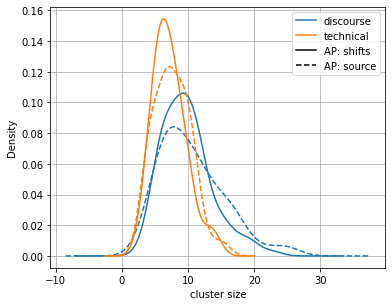

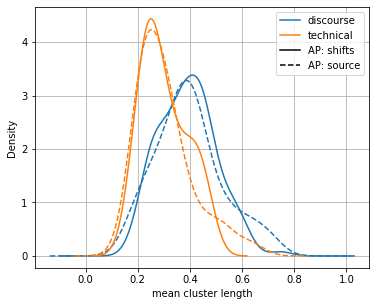

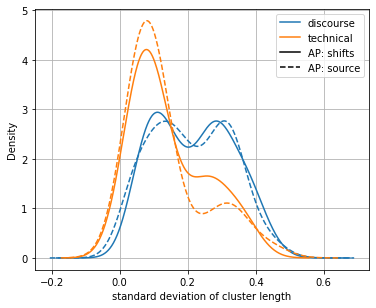

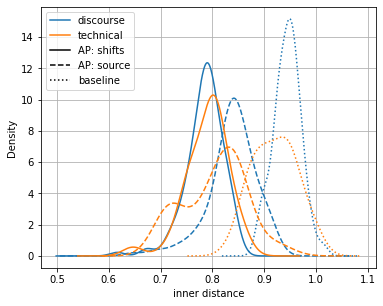

In [62]:
size_factor = 6
linewidth = size_factor/3
dotsize = size_factor*2 # for scatter plots
rows = 1
columns = 1


c = {"dis":"tab:blue",
     "tec":"tab:orange"}
ls = {"aps":"-",
      "src":"--"}

for aspect,xname in zip(["cluster_size", "mean_length", "std_length", "inner_distance"],
                  ["cluster size", "mean cluster length", "standard deviation of cluster length", "inner distance"]):

    fig, axes = plt.subplots(rows, columns, figsize=(size_factor*columns, 0.8*size_factor*rows))
    ax=axes
    pandas.Series(df_clust_dis_aps[aspect]).plot.kde(label="discourse", ax=ax, color=c["dis"], linestyle=ls["aps"])
    pandas.Series(df_clust_dis_src[aspect]).plot.kde(label="", ax=ax, color=c["dis"], linestyle=ls["src"])
    if aspect == "inner_distance":
        pandas.Series(df_dis_bl[aspect]).plot.kde(label="", ax=ax, color=c["dis"], linestyle=":")
    
    pandas.Series(df_clust_tec_aps[aspect]).plot.kde(label="technical", ax=ax, color=c["tec"], linestyle=ls["aps"])
    pandas.Series(df_clust_tec_src[aspect]).plot.kde(label="", ax=ax, color=c["tec"], linestyle=ls["src"])
    if aspect == "inner_distance":
        pandas.Series(df_tec_bl[aspect]).plot.kde(label="", ax=ax, color=c["tec"], linestyle=":")
        
    plt.plot([], label="AP: shifts", linestyle="-", color="black")
    plt.plot([], label="AP: source", linestyle="--", color="black")
    if aspect == "inner_distance":
        plt.plot([], label="baseline", linestyle=":", color="black")
        

    ax.set_xlabel(xname)
    ax.grid()
    ax.legend()
    #plt.savefig("visuals/shift_experiments/distech_training_technique/"+aspect+".png", dpi=300)
    print(aspect)
    print(f"discourse APshift:    {round(np.mean(df_clust_dis_aps[aspect]), 4)}")
    print(f"discourse APsource:   {round(np.mean(df_clust_dis_src[aspect]), 4)}")
    print(f"technical APshift:    {round(np.mean(df_clust_tec_aps[aspect]), 4)}")
    print(f"technical APsource:   {round(np.mean(df_clust_tec_src[aspect]), 4)}")
    print("")


### Pair Distances: Do `dis` and `tec` differ?
This doesn't function with only the data loaded above. You need to load all 6 APshift dataframes of the DisTech experiments. 

In [35]:
# Load the dataframes for the pair distances individually (they'll be deleted after this to save memory)
_, dist1, _ = read_results(d1+y1+e3, s2, e3, tuples=False, with_baseline=False)
_, dist2, _ = read_results(d1+y1+e3, s3, e3, tuples=False, with_baseline=False)
_, dist3, _ = read_results(d1+y2+e3, s2, e3, tuples=False, with_baseline=False)
_, dist4, _ = read_results(d1+y2+e3, s3, e3, tuples=False, with_baseline=False)
_, dist5, _ = read_results(d3+y2+e3, s2, e3, tuples=False, with_baseline=False)
_, dist6, _ = read_results(d3+y2+e3, s3, e3, tuples=False, with_baseline=False)

visuals/shift_experiments/distech_boxplot.png


/home/simon/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/simon/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


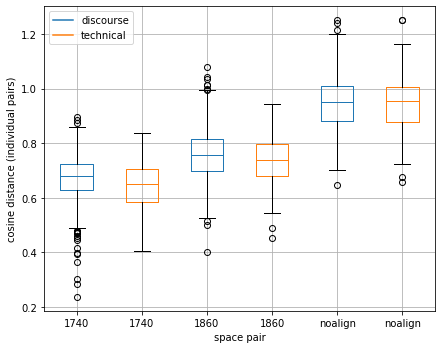

In [36]:
size_factor = 7
linewidth = size_factor/3
dotsize = size_factor*2 # for scatter plots
rows = 1
columns = 1
fig, axes = plt.subplots(rows, columns, figsize=(size_factor*columns, 0.8*size_factor*rows))


c1 = "tab:blue"
axes.boxplot([dist1["distance"], dist3["distance"], dist5["distance"]], positions=[1,3,5],
             boxprops=dict(color=c1),
             labels=["1740", "1860", "noalign"],
             medianprops=dict(color=c1))

c2 = "tab:orange"
axes.boxplot([dist2["distance"], dist4["distance"], dist6["distance"]], positions=[2, 4, 6],
             boxprops=dict(color=c2),
             labels=["1740", "1860", "noalign"],
             medianprops=dict(color=c2))                                         

axes.plot([],[], color=c1, label="discourse") # for the legend
axes.plot([],[], color=c2, label="technical")

axes.grid()
axes.legend()
axes.set_xlabel("space pair")
axes.set_ylabel("cosine distance (individual pairs)")


outdir = "visuals/shift_experiments/distech_boxplot.png"
print(outdir)
#plt.savefig(outdir, dpi=250)


In [37]:
# clean up!
del dist1
del dist2
del dist3
del dist4
del dist5
del dist6

### Compare Clusters: Scatter Plots and KDE-Curves (not Included in the Thesis)


visuals/shift_experiments/1860_1890/dis_tech/distech_scatter_normdist.png


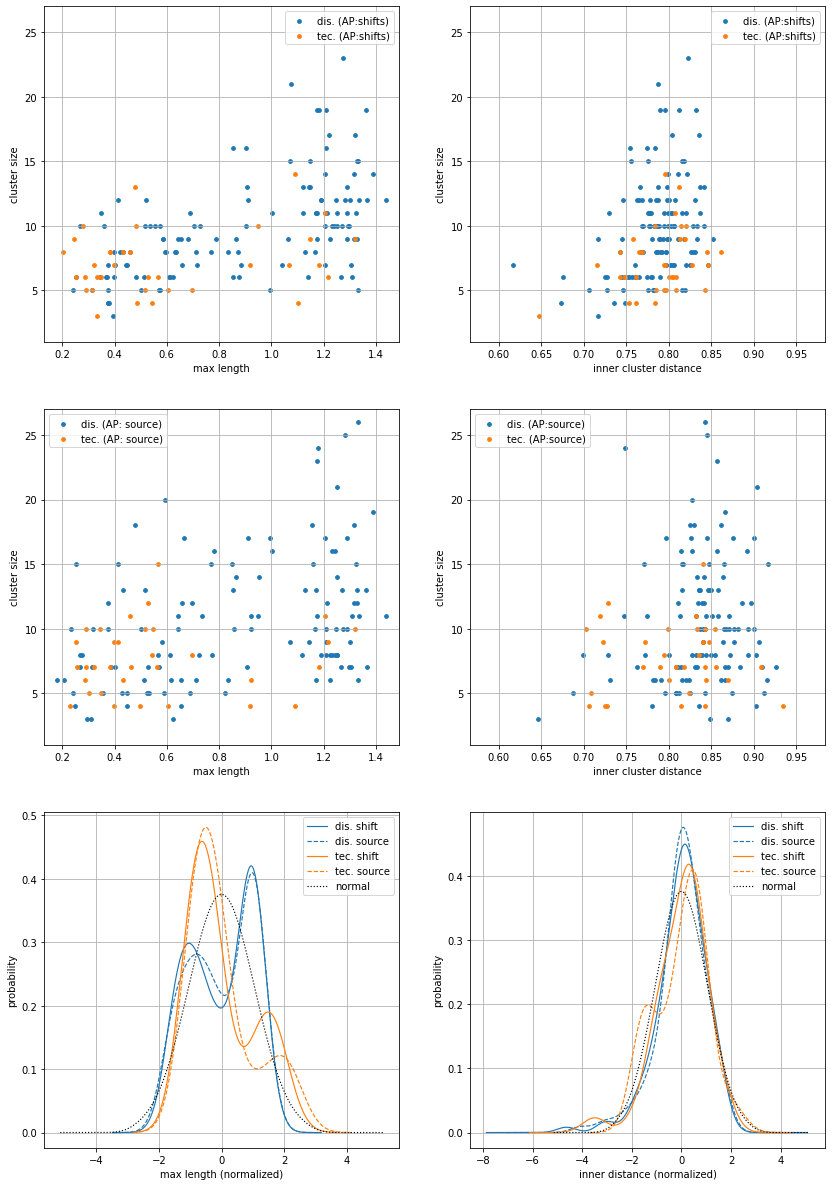

In [48]:
size_factor = 7
linewidth = size_factor/6
dotsize = size_factor*2 # for scatter plots
rows = 3
columns = 2
fig, axes = plt.subplots(rows, columns, figsize=(size_factor*columns, size_factor*rows))

# for estimated normal distributions 
samples = max(len(df_clust_dis_aps), len(df_clust_tec_aps), len(df_clust_dis_src), len(df_clust_tec_src))
normal = make_normal_dist(samples, 1000)
bw="scott"

c = {"dis":"tab:blue",
     "tec":"tab:orange"}

length_measure = "max_length"
length_label = "max length"


# 1. not normalized, for scatter plots
# cluster sizes
aps_dis_sizes = df_clust_dis_aps["cluster_size"]
aps_tec_sizes = df_clust_tec_aps["cluster_size"]
src_dis_sizes = df_clust_dis_src["cluster_size"]
src_tec_sizes = df_clust_tec_src["cluster_size"]

# values for AP-SHIFT
aps_dis_lengths = df_clust_dis_aps[length_measure]
aps_dis_inner   = df_clust_dis_aps["inner_distance"]
aps_tec_lengths = df_clust_tec_aps[length_measure]
aps_tec_inner   = df_clust_tec_aps["inner_distance"]

# values for AP-SOURCE
src_dis_lengths = df_clust_dis_src[length_measure]
src_dis_inner   = df_clust_dis_src["inner_distance"]
src_tec_lengths = df_clust_tec_src[length_measure]
src_tec_inner   = df_clust_tec_src["inner_distance"]


max_cluster_size = np.max([np.max(v) for v in [aps_dis_sizes, aps_tec_sizes, 
                                               src_dis_sizes, src_tec_sizes]])
y_lim = (1, max_cluster_size+1)

min_length = np.min([np.min(v) for v in [aps_dis_lengths, aps_tec_lengths, src_dis_lengths, src_tec_lengths]])#, bl_dis_maxes, bl_tec_maxes]])
min_inner  = np.min([np.min(v) for v in [aps_dis_inner, aps_tec_inner, src_dis_inner, src_tec_inner]])#, bl_dis_inner, bl_tec_inner]])

max_length = np.max([np.max(v) for v in [aps_dis_lengths, aps_tec_lengths, src_dis_lengths, src_tec_lengths]])#, bl_dis_maxes, bl_tec_maxes]])
max_inner  = np.max([np.max(v) for v in [aps_dis_inner, aps_tec_inner, src_dis_inner, src_tec_inner]])#, bl_dis_inner, bl_tec_inner]])

xlim_length = (min_length-0.05, max_length+0.05)
xlim_inner  = (min_inner-0.05,  max_inner+0.05)




def make_scatterplot(ax, xs, ys, labels, colors, axlabels, axlimits, dotsize):
    for x,y,l,c in zip(xs, ys, labels, colors):
        ax.scatter(x,y,label=l, s=dotsize)
        
    ax.set_xlim(axlimits[0])
    ax.set_ylim(axlimits[1])
    ax.legend()
    ax.grid()
    ax.set_xlabel(axlabels[0])
    ax.set_ylabel(axlabels[1])

# shift cluster lengths of AP-SHIFT
make_scatterplot(axes[0,0], 
                 [aps_dis_lengths, aps_tec_lengths], 
                 [aps_dis_sizes,   aps_tec_sizes], 
                 ["dis. (AP:shifts)", "tec. (AP:shifts)"], 
                 [c["dis"],c["tec"]],
                 (length_label, "cluster size"), (xlim_length, y_lim), dotsize)

make_scatterplot(axes[0,1], 
                 [aps_dis_inner, aps_tec_inner], 
                 [aps_dis_sizes,   aps_tec_sizes], 
                 ["dis. (AP:shifts)", "tec. (AP:shifts)"], 
                 [c["dis"],c["tec"]],
                 ("inner cluster distance", "cluster size"), (xlim_inner, y_lim), dotsize)

# shift cluster lengths of AP-FIRST
make_scatterplot(axes[1,0], 
                 [src_dis_lengths, src_tec_lengths], 
                 [src_dis_sizes,   src_tec_sizes], 
                 ["dis. (AP: source)", "tec. (AP: source)"], 
                 [c["dis"],c["tec"]],
                 (length_label, "cluster size"), (xlim_length, y_lim), dotsize)

make_scatterplot(axes[1,1], 
                 [src_dis_inner, src_tec_inner], 
                 [src_dis_sizes,   src_tec_sizes], 
                 ["dis. (AP:source)", "tec. (AP:source)"], 
                 [c["dis"],c["tec"]],
                 ("inner cluster distance", "cluster size"), (xlim_inner, y_lim), dotsize)



# estimated normal distributions (AP-SHIFT and AP-FIRST combined)
# normalized values for estimated distributions
aps_dis_lengths =   add_z_scores(df_clust_dis_aps, length_measure+"_zscore", aps_dis_lengths)
aps_dis_inner   =   add_z_scores(df_clust_dis_aps, "inner_dist_zscore",      aps_dis_inner)
aps_tec_lengths =   add_z_scores(df_clust_tec_aps, length_measure+"_zscore", aps_tec_lengths)
aps_tec_inner   =   add_z_scores(df_clust_tec_aps, "inner_dist_zscore",      aps_tec_inner)

src_dis_lengths =   add_z_scores(df_clust_dis_src, length_measure+"_zscore", src_dis_lengths)
src_dis_inner   =   add_z_scores(df_clust_dis_src, "inner_dist_zscore",      src_dis_inner)
src_tec_lengths =   add_z_scores(df_clust_tec_src, length_measure+"_zscore", src_tec_lengths)
src_tec_inner   =   add_z_scores(df_clust_tec_src, "inner_dist_zscore",      src_tec_inner)

# cluster sizes
aps_dis_sizes = add_z_scores(df_clust_dis_aps, "cluster_size_zscore", aps_dis_sizes)
aps_tec_sizes = add_z_scores(df_clust_tec_aps, "cluster_size_zscore", aps_tec_sizes)

src_dis_sizes = add_z_scores(df_clust_dis_src, "cluster_size_zscore", src_dis_sizes)
src_tec_sizes = add_z_scores(df_clust_tec_src, "cluster_size_zscore", src_tec_sizes)


# cluster lengths
ax = axes[2,0]
make_kde_plots(ax, 
              [aps_dis_lengths, src_dis_lengths, aps_tec_lengths, src_tec_lengths, normal],
              ["dis. shift",    "dis. source",   "tec. shift",    "tec. source",   "normal"],
              [c["dis"],        c["dis"],        c["tec"],        c["tec"],        "black"],
              ["-",             "--",            "-",             "--",            ":"],
              [linewidth]*5, method=bw) 
ax.grid()
ax.legend()
ax.set_ylabel("probability")
ax.set_xlabel(length_label+" (normalized)")

# inner distances
ax = axes[2,1]
make_kde_plots(ax, 
              [aps_dis_inner, src_dis_inner, aps_tec_inner, src_tec_inner, normal],
              ["dis. shift",  "dis. source", "tec. shift",  "tec. source", "normal"],
              [c["dis"],      c["dis"],      c["tec"],      c["tec"],      "black"],
              ["-",           "--",          "-",           "--",          ":"],
              [linewidth]*5, method=bw) 
ax.grid()
ax.legend()
ax.set_ylabel("probability")
ax.set_xlabel("inner distance (normalized)")
        
print(visuals_dir+"distech_scatter_normdist.png")
#plt.savefig(visuals_dir+"distech_scatter_normdist.png", dpi=300)

### Make scatter Plots of Lengths against Inner Distances (not Included in the Thesis)
Instead of only plotting 3 data sets, we have 6 now: (aps, src, bl) x (dis, tec)

visuals/shift_experiments/1860_1890/dis_tech/inner_length_std.png
correlations          max     mean    median  std   
discourse, APshifts   0.1854  0.0412  -0.0716  0.1274
technical, APshifts   0.2256  0.1360  0.1236  0.1774
discourse, APsource   0.1109  0.0585  -0.0088  0.1035
technical, APsource   0.3359  0.4095  0.4094  0.2534
discourse, baseline   -0.0172  -0.0402  -0.0906  0.0340
technical, baseline   -0.0857  -0.0191  -0.0895  -0.0404


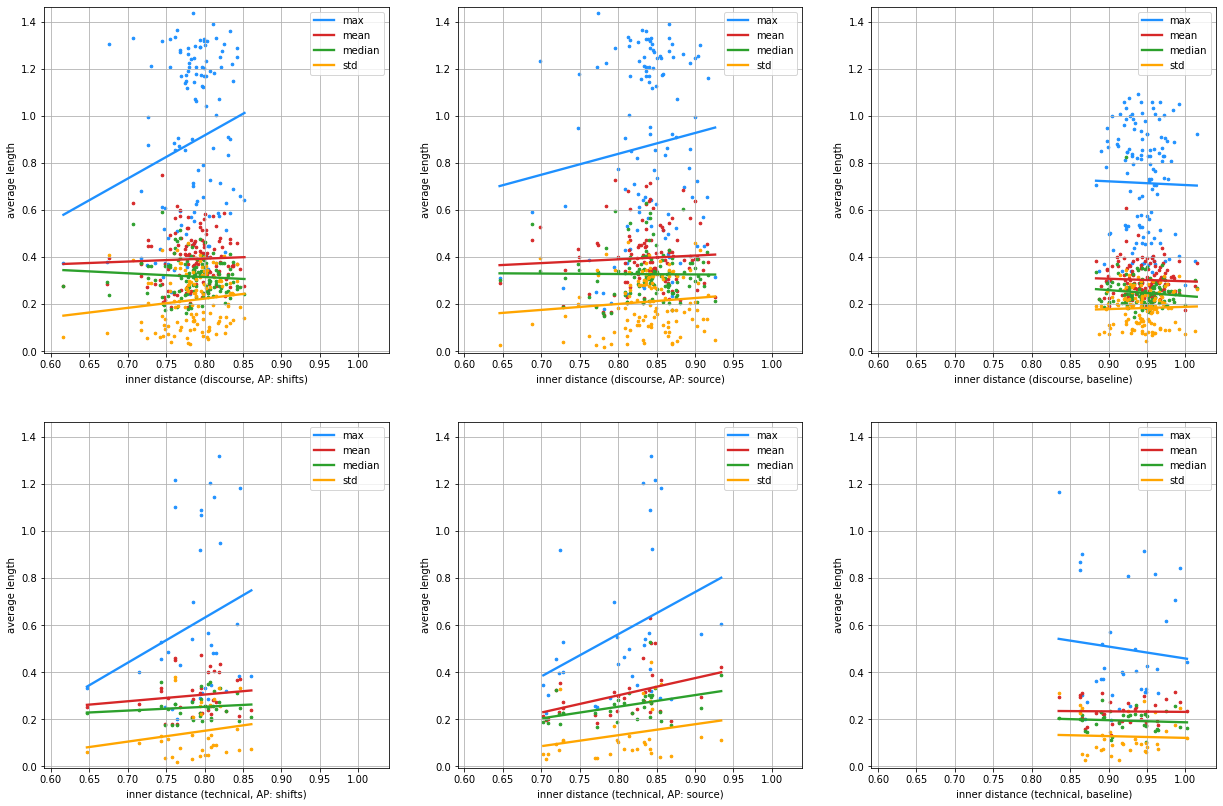

In [52]:
size_factor = 7
linewidth = size_factor/3 # for line plots
dotsize = size_factor*1 # for scatter plots
rows=2
columns=3
fig, axes = plt.subplots(rows, columns, figsize=(size_factor*columns, size_factor*rows))


# values for AP-SHIFT 
# [0,0]
aps_dis_maxes = df_clust_dis_aps["max_length"]
aps_dis_means = df_clust_dis_aps["mean_length"]
aps_dis_medians = df_clust_dis_aps["median_length"]
aps_dis_std   = df_clust_dis_aps["std_length"]
aps_dis_inner = df_clust_dis_aps["inner_distance"]
# [1,0]
aps_tec_maxes = df_clust_tec_aps["max_length"]
aps_tec_means = df_clust_tec_aps["mean_length"]
aps_tec_medians = df_clust_tec_aps["median_length"]
aps_tec_std   = df_clust_tec_aps["std_length"]
aps_tec_inner = df_clust_tec_aps["inner_distance"]

# values for AP-FIRST
# [0,1]
src_dis_maxes = df_clust_dis_src["max_length"]
src_dis_means = df_clust_dis_src["mean_length"]
src_dis_medians = df_clust_dis_src["median_length"]
src_dis_std   = df_clust_dis_src["std_length"]
src_dis_inner = df_clust_dis_src["inner_distance"]
# [1,1]
src_tec_maxes = df_clust_tec_src["max_length"]
src_tec_means = df_clust_tec_src["mean_length"]
src_tec_medians = df_clust_tec_src["median_length"]
src_tec_std   = df_clust_tec_src["std_length"]
src_tec_inner = df_clust_tec_src["inner_distance"]

# values for baseline
# [0,2]
bl_dis_maxes = df_dis_bl["max_length"]
bl_dis_means = df_dis_bl["mean_length"]
bl_dis_medians = df_dis_bl["median_length"]
bl_dis_std   = df_dis_bl["std_length"]
bl_dis_inner = df_dis_bl["inner_distance"]
# [1,2]
bl_tec_maxes = df_tec_bl["max_length"]
bl_tec_means = df_tec_bl["mean_length"]
bl_tec_medians = df_tec_bl["median_length"]
bl_tec_std   = df_tec_bl["std_length"]
bl_tec_inner = df_tec_bl["inner_distance"]




min_max    = np.min([np.min(v) for v in [aps_dis_maxes, aps_tec_maxes, src_dis_maxes, src_tec_maxes, bl_dis_maxes, bl_tec_maxes]])
min_mean   = np.min([np.min(v) for v in [aps_dis_means, aps_tec_means, src_dis_means, src_tec_means, bl_dis_means, bl_tec_means]])
min_median = np.min([np.min(v) for v in [aps_dis_medians, aps_tec_medians, src_dis_medians, src_tec_medians, bl_dis_medians, bl_tec_medians]])
min_std    = np.min([np.min(v) for v in [aps_dis_std, aps_tec_std, src_dis_std, src_tec_std, bl_dis_std, bl_tec_std]])
min_inner  = np.min([np.min(v) for v in [aps_dis_inner, aps_tec_inner, src_dis_inner, src_tec_inner, bl_dis_inner, bl_tec_inner]])

max_max    = np.max([np.max(v) for v in [aps_dis_maxes, aps_tec_maxes, src_dis_maxes, src_tec_maxes, bl_dis_maxes, bl_tec_maxes]])
max_mean   = np.max([np.max(v) for v in [aps_dis_means, aps_tec_means, src_dis_means, src_tec_means, bl_dis_means, bl_tec_means]])
max_median = np.max([np.max(v) for v in [aps_dis_medians, aps_tec_medians, src_dis_medians, src_tec_medians, bl_dis_medians, bl_tec_medians]])
max_std    = np.max([np.max(v) for v in [aps_dis_std, aps_tec_std, src_dis_std, src_tec_std, bl_dis_std, bl_tec_std]])
max_inner  = np.max([np.max(v) for v in [aps_dis_inner, aps_tec_inner, src_dis_inner, src_tec_inner, bl_dis_inner, bl_tec_inner]])

y_lim = (min(min_max, min_mean, min_median, min_std)-0.025, 
         max(max_max, max_mean, max_median, max_std)+0.025)
x_lim = (min_inner-0.025, 
         max_inner+0.025)

cs = {"max":"dodgerblue", # line color
      "mean":"tab:red",
      "median":"tab:green",
      "std":"orange",
      "normal":"black"}
cl=cs

labels = [   "max",     "mean",     "median",     "std"]
colors = [cs["max"], cs["mean"], cs["median"], cs["std"]]


# DISCOURSE
# APshift
scatter_and_regressionline(axes[0,0], aps_dis_inner,
                           [aps_dis_maxes, aps_dis_means, aps_dis_medians, aps_dis_std], 
                           labels, colors, ("average length", "inner distance (discourse, AP: shifts)"),
                           (x_lim, y_lim), dotsize, linewidth)
# APsource
scatter_and_regressionline(axes[0,1], src_dis_inner,
                           [src_dis_maxes, src_dis_means, src_dis_medians, src_dis_std], 
                           labels, colors, ("average length", "inner distance (discourse, AP: source)"),
                           (x_lim, y_lim), dotsize, linewidth)
# baseline
scatter_and_regressionline(axes[0,2], bl_dis_inner,
                           [bl_dis_maxes, bl_dis_means, bl_dis_medians, bl_dis_std], 
                           labels, colors, ("average length", "inner distance (discourse, baseline)"),
                           (x_lim, y_lim), dotsize, linewidth)
# TECHNICAL
# APshift
scatter_and_regressionline(axes[1,0], aps_tec_inner,
                           [aps_tec_maxes, aps_tec_means, aps_tec_medians, aps_tec_std], 
                           labels, colors, ("average length", "inner distance (technical, AP: shifts)"),
                           (x_lim, y_lim), dotsize, linewidth)
#  APsource
scatter_and_regressionline(axes[1,1], src_tec_inner,
                          [src_tec_maxes, src_tec_means, src_tec_medians, src_tec_std], 
                           labels, colors, ("average length", "inner distance (technical, AP: source)"),
                           (x_lim, y_lim), dotsize, linewidth)
# baseline
scatter_and_regressionline(axes[1,2], bl_tec_inner,
                           [bl_tec_maxes, bl_tec_means, bl_tec_medians, bl_tec_std], 
                           labels, colors, ("average length", "inner distance (technical, baseline)"),
                           (x_lim, y_lim), dotsize, linewidth)

print(visuals_dir+"inner_length_std.png")
#plt.savefig(visuals_dir+"inner_length_std.png", dpi=300)


def rho(x,y): return np.corrcoef(x,y)[0,1]
print(f"{'correlations':<20}  {'max':<6}  {'mean':<6}  {'median':<6}  {'std':<6}")

print(f"{'discourse, APshifts':<20}  {rho(aps_dis_inner, aps_dis_maxes):<5.4f}  {rho(aps_dis_inner, aps_dis_means):<5.4f}  {rho(aps_dis_inner, aps_dis_medians):<5.4f}  {rho(aps_dis_inner, aps_dis_std):<5.4f}")
print(f"{'technical, APshifts':<20}  {rho(aps_tec_inner, aps_tec_maxes):<5.4f}  {rho(aps_tec_inner, aps_tec_means):<5.4f}  {rho(aps_tec_inner, aps_tec_medians):<5.4f}  {rho(aps_tec_inner, aps_tec_std):<5.4f}")
print(f"{'discourse, APsource':<20}  {rho(src_dis_inner, src_dis_maxes):<5.4f}  {rho(src_dis_inner, src_dis_means):<5.4f}  {rho(src_dis_inner, src_dis_medians):<5.4f}  {rho(src_dis_inner, src_dis_std):<5.4f}")
print(f"{'technical, APsource':<20}  {rho(src_tec_inner, src_tec_maxes):<5.4f}  {rho(src_tec_inner, src_tec_means):<5.4f}  {rho(src_tec_inner, src_tec_medians):<5.4f}  {rho(src_tec_inner, src_tec_std):<5.4f}")
print(f"{'discourse, baseline':<20}  { rho(bl_dis_inner, bl_dis_maxes):<5.4f}  { rho(bl_dis_inner, bl_dis_means):<5.4f}  { rho(bl_dis_inner, bl_dis_medians):<5.4f}  {rho(bl_dis_inner, bl_dis_std):<5.4f}")
print(f"{'technical, baseline':<20}  { rho(bl_tec_inner, bl_tec_maxes):<5.4f}  { rho(bl_tec_inner, bl_tec_means):<5.4f}  { rho(bl_tec_inner, bl_tec_medians):<5.4f}  {rho(bl_tec_inner, bl_tec_std):<5.4f}")

#with open("visuals/shift_experiments/length_correlations.txt", "a") as f:
#    f.write("\n\n"+visuals_dir+"inner_length_std.png")
#    f.write(f"\n{'correlations':<20}  {'max':<6}  {'mean':<6}  {'median':<6}  {'std':<6}")
#    f.write(f"\n{'discourse, APshifts':<20}  {rho(aps_dis_inner, aps_dis_maxes):<5.4f}  {rho(aps_dis_inner, aps_dis_means):<5.4f}  {rho(aps_dis_inner, aps_dis_medians):<5.4f}  {rho(aps_dis_inner, aps_dis_std):<5.4f}")
#    f.write(f"\n{'technical, APshifts':<20}  {rho(aps_tec_inner, aps_tec_maxes):<5.4f}  {rho(aps_tec_inner, aps_tec_means):<5.4f}  {rho(aps_tec_inner, aps_tec_medians):<5.4f}  {rho(aps_tec_inner, aps_tec_std):<5.4f}")
#    f.write(f"\n{'discourse, APsource':<20}  {rho(src_dis_inner, src_dis_maxes):<5.4f}  {rho(src_dis_inner, src_dis_means):<5.4f}  {rho(src_dis_inner, src_dis_medians):<5.4f}  {rho(src_dis_inner, src_dis_std):<5.4f}")
#    f.write(f"\n{'technical, APsource':<20}  {rho(src_tec_inner, src_tec_maxes):<5.4f}  {rho(src_tec_inner, src_tec_means):<5.4f}  {rho(src_tec_inner, src_tec_medians):<5.4f}  {rho(src_tec_inner, src_tec_std):<5.4f}")
#    f.write(f"\n{'discourse, baseline':<20}  { rho(bl_dis_inner, bl_dis_maxes):<5.4f}  { rho(bl_dis_inner, bl_dis_means):<5.4f}  { rho(bl_dis_inner, bl_dis_medians):<5.4f}  {rho(bl_dis_inner, bl_dis_std):<5.4f}")
#    f.write(f"\n{'technical, baseline':<20}  { rho(bl_tec_inner, bl_tec_maxes):<5.4f}  { rho(bl_tec_inner, bl_tec_means):<5.4f}  { rho(bl_tec_inner, bl_tec_medians):<5.4f}  {rho(bl_tec_inner, bl_tec_std):<5.4f}")


## Qualitative Analysis (DisTech) 

### Discourse Word Shift Clusters

In [53]:
k=0 # select clusters by z-score (+/-1.65) if k==0 or just the top/bottom k

low_maxes      = significant_clusters(df_clust_dis_aps, "max_length_zscore", "low",k=k)
low_means      = significant_clusters(df_clust_dis_aps, "mean_length_zscore", "low",k=k)
low_sizes      = significant_clusters(df_clust_dis_aps, "cluster_size_zscore", "low",k=k)
low_inner_dist = significant_clusters(df_clust_dis_aps, "inner_dist_zscore", "low",k=k)

high_maxes      = significant_clusters(df_clust_dis_aps, "max_length_zscore", "high",k=k)
high_means      = significant_clusters(df_clust_dis_aps, "mean_length_zscore", "high",k=k)
high_sizes      = significant_clusters(df_clust_dis_aps, "cluster_size_zscore", "high",k=k)
high_inner_dist = significant_clusters(df_clust_dis_aps, "inner_dist_zscore", "high",k=k)

In [54]:
print_clusters(low_sizes, "SMALLEST CLUSTERS")
print_clusters(high_sizes, "BIGGEST CLUSTERS")

SMALLEST CLUSTERS 

centroid: arterial (ID: 120)
size:        3    
labels:      venous, **, pulmonary, lymphatic, vena
members:     specific, arterial, writing



BIGGEST CLUSTERS 

centroid: necessary (ID: 6)
size:        17   
labels:      desirable, advisable, unnecessary, convenient, possible
members:     branching, customary, essential, odd, requisite, necessary, uncommon, available, unsuitable, impracticable, anxious, uniform, sufficient, fitting, liable, undetermined, vain

centroid: twisting (ID: 9)
size:        19   
labels:      grasping, grip, thrust, tightening, sustained
members:     mounting, hearing, long, governing, intersecting, fragile, bent, closing, running, symmetrical, flying, surveying, terminating, crushing, +3, acquiring, viscid, twisting, isotropic

centroid: wearing (ID: 16)
size:        23   
labels:      naming, detachment, intercourse, spreading, sending
members:     ripening, sliding, sounding, sustaining, graduating, throwing, wearing, chinese, polishin

In [55]:
print_clusters(low_means, "SHORTEST CLUSTERS")
print_clusters(high_means, "LONGEST CLUSTERS")

SHORTEST CLUSTERS 

centroid: shorter (ID: 75)
size:        5    
labels:      longer, stronger, narrower, wider, straighter
members:     larger, shorter, longer, slower, short

centroid: seen (ID: 81)
size:        10   
labels:      found, observed, noticed, disclosed, evident
members:     seen, occurring, so, observable, obvious, less, noticed, evident, noted, observed

centroid: special (ID: 103)
size:        6    
labels:      especial, particular, external, undue, valvular
members:     new, particular, special, immediate, former, same

centroid: third (ID: 111)
size:        5    
labels:      fourth, sixth, fifth, second, tenth
members:     mandibular, second, third, sixth, first



LONGEST CLUSTERS 

centroid: elastic (ID: 15)
size:        7    
labels:      plastic, frictional, gun-shot, stresses, cohesion
members:     conventional, shearing, elastic, flattening, vital, conceived, condensed

centroid: verifying (ID: 27)
size:        14   
labels:      disprove, confirmation, inv

In [56]:
print_clusters(low_inner_dist, "TIGHTEST CLUSTERS")
print_clusters(high_inner_dist, "LOOSEST CLUSTERS")

TIGHTEST CLUSTERS 

centroid: arterial (ID: 120)
size:        3    
labels:      venous, **, pulmonary, lymphatic, vena
members:     specific, arterial, writing

centroid: identifying (ID: 121)
size:        9    
labels:      discovering, associating, transferring, maintaining, isolating
members:     charging, exclusive, saving, crossing, isolating, identifying, getting, reducible, placing

centroid: illuminating (ID: 122)
size:        5    
labels:      shutting, illuminated, incandescent, diselectrifying, otto
members:     illuminating, coming, permitting, burning, emerging

centroid: assumed (ID: 123)
size:        6    
labels:      supposed, imagined, known, called, said
members:     found, reading, suspected, common, supposed, assumed

centroid: worthy (ID: 124)
size:        4    
labels:      deserving, deserves, deserve, priority, merit
members:     worthy, deserving, outside, capable

centroid: comparable (ID: 125)
size:        7    
labels:      distinguishable, differing, aki

### Technical Term Shift Clusters

In [57]:
k=0 #select clusters by z-score (+/-1.65) if k==0 or just the top/bottom k

low_maxes      = significant_clusters(df_clust_tec_aps, "max_length_zscore", "low",k=k)
low_means      = significant_clusters(df_clust_tec_aps, "mean_length_zscore", "low",k=k)
low_sizes      = significant_clusters(df_clust_tec_aps, "cluster_size_zscore", "low",k=k)
low_inner_dist = significant_clusters(df_clust_tec_aps, "inner_dist_zscore", "low",k=k)

high_maxes      = significant_clusters(df_clust_tec_aps, "max_length_zscore", "high",k=k)
high_means      = significant_clusters(df_clust_tec_aps, "mean_length_zscore", "high",k=k)
high_sizes      = significant_clusters(df_clust_tec_aps, "cluster_size_zscore", "high",k=k)
high_inner_dist = significant_clusters(df_clust_tec_aps, "inner_dist_zscore", "high",k=k)

In [58]:
print_clusters(low_sizes, "SMALLEST CLUSTERS")
print_clusters(high_sizes, "BIGGEST CLUSTERS")

SMALLEST CLUSTERS 

centroid: gave (ID: 34)
size:        3    
labels:      yielded, gives, giving, give, yields
members:     yielded, gave, giving



BIGGEST CLUSTERS 

centroid: acetic (ID: 9)
size:        13   
labels:      hydrochloric, formic, glacial, sulphuric, sulphuretted
members:     cadmium, blowing, acetic, olefiant, octahedral, boiling, stellar, alcohol, diluting, iodine, ammonia, ether, allyl

centroid: silver (ID: 17)
size:        14   
labels:      aluminium, zinc, asbestos, copper, -iron
members:     gold, plate-glass, liquor, thallium, platinum, peroxide, bismuth, phosphorus, tellurium, hue, p.r.s., silver, aluminium, antimony





In [59]:
print_clusters(low_means, "SHORTEST CLUSTERS")
print_clusters(high_means, "LONGEST CLUSTERS")

SHORTEST CLUSTERS 



LONGEST CLUSTERS 

centroid: placing (ID: 18)
size:        7    
labels:      keeping, maintaining, keep, bringing, introducing
members:     identification, interposing, agitating, placing, measure, classifying, afforded

centroid: fluoride (ID: 26)
size:        6    
labels:      chloride, sulphide, nitrate, electrolytically, phyllocyanin
members:     sulphide, salt, saturating, corks, fluoride, cyanide

centroid: double (ID: 27)
size:        4    
labels:      triple, single, split, gill, chatelier
members:     triple, single, elemental, double





In [60]:
print_clusters(low_inner_dist, "TIGHTEST CLUSTERS")
print_clusters(high_inner_dist, "LOOSEST CLUSTERS")

TIGHTEST CLUSTERS 

centroid: oxygen (ID: 33)
size:        7    
labels:      c02, c03, air, nitrogen, carbon
members:     substance, ozone, oxygen, executed, heat, cyanogen, hydrogen

centroid: gave (ID: 34)
size:        3    
labels:      yielded, gives, giving, give, yields
members:     yielded, gave, giving



LOOSEST CLUSTERS 

centroid: derived (ID: 0)
size:        8    
labels:      derivable, originated, deduced, arisen, eliminated
members:     said, doubly, proved, derived, produced, methods, derivable, deduced



